In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
if IN_COLAB:
  # Install dependencies
  ! pip install --upgrade pip
  ! pip install czitools
  ! pip install ipyfilechooser

In [3]:
# import the required libraries
from czitools import metadata_tools as czimd
from czitools import read_tools as czird
from czitools import misc_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
from pathlib import Path
import os
import dask.array as da
import requests

if not IN_COLAB:
    from czitools import napari_tools
    import napari


In [4]:
# try to find the folder with data and download otherwise from GitHub.

# Folder containing the input data
if IN_COLAB:
    INPUT_FOLDER = 'data/'
if not IN_COLAB:
    INPUT_FOLDER = '../../data/'

# Path to the data on GitHub
GITHUB_IMAGES_PATH = "https://raw.githubusercontent.com/sebi06/czitools/main/data.zip"

# Download data
if not (os.path.isdir(INPUT_FOLDER)):
    compressed_data = './data.zip'
    if not os.path.isfile(compressed_data):
        import io
        response = requests.get(GITHUB_IMAGES_PATH, stream=True)
        compressed_data = io.BytesIO(response.content)

    import zipfile
    with zipfile.ZipFile(compressed_data, 'r') as zip_accessor:
        zip_accessor.extractall('./')

In [5]:
fc = FileChooser()
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='F:\Github\czitools\demo\notebooks', filename='', title='', show_hidden=False, select_desc='S…

In [6]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

F:\Github\czitools\data
CellDivision_T=10_Z=15_CH=2_DCV_small.czi
F:\Github\czitools\data\CellDivision_T=10_Z=15_CH=2_DCV_small.czi


In [7]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get the CZI metadata dictionary directly from filename
mdict = czimd.create_mdict_red(mdata, sort=False, remove_none=True)

# convert metadata dictionary to a pandas dataframe
mdframe = misc_tools.md2dataframe(mdict)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

2024-01-08 15:36:06,640 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:06,645 -  INFO - Reading BoundingBoxes from CZI image data.
2024-01-08 15:36:06,646 -  INFO - Reading Channel Information from CZI image data.
2024-01-08 15:36:06,647 -  INFO - Reading Scaling from CZI image data.
2024-01-08 15:36:06,647 -  INFO - Reading Objective Information from CZI image data.
2024-01-08 15:36:06,648 -  INFO - Reading Detector Information from CZI image data.
2024-01-08 15:36:06,649 -  INFO - Reading Microscope Information from CZI image data.
2024-01-08 15:36:06,649 -  INFO - Reading SampleCarrier Information from CZI image data.
2024-01-08 15:36:06,650 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:06,650 -  INFO - No Scene or Well information found. Try to read XY Stage Coordinates from subblocks.
2024-01-08 15:36:06,799 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:06,807 -  INFO - Reading additional Metedata from CZI image data.
2

,Parameter,Value
0,Directory,F:\Github\czitools\data
1,Filename,CellDivision_T=10_Z=15_CH=2_DCV_small.czi
2,AcqDate,2016-02-12T09:41:02.4915604Z
3,CreationDate,2016-02-12T10:41:02.5655647+01:00
4,UserName,M1SRH
5,SW-App,3.1.0.0000
6,SW-Version,ZEN 3.1 (blue edition)
7,SizeX,256
8,SizeY,256
9,SizeZ,15


In [8]:
# return array with dimension order STCZYX(A)
array6d, mdata= czird.read_6darray(fc.selected, use_dask=False, chunk_zyx=False)

# show dask array structure
if isinstance(array6d, da.Array):
    print(array6d)
else:
    print("Shape:", array6d.shape, "dtype:", array6d.dtype)


2024-01-08 15:36:32,177 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:32,180 -  INFO - Reading BoundingBoxes from CZI image data.
2024-01-08 15:36:32,180 -  INFO - Reading Channel Information from CZI image data.
2024-01-08 15:36:32,181 -  INFO - Reading Scaling from CZI image data.
2024-01-08 15:36:32,182 -  INFO - Reading Objective Information from CZI image data.
2024-01-08 15:36:32,183 -  INFO - Reading Detector Information from CZI image data.
2024-01-08 15:36:32,183 -  INFO - Reading Microscope Information from CZI image data.
2024-01-08 15:36:32,184 -  INFO - Reading SampleCarrier Information from CZI image data.
2024-01-08 15:36:32,184 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:32,184 -  INFO - No Scene or Well information found. Try to read XY Stage Coordinates from subblocks.
2024-01-08 15:36:32,403 -  INFO - Reading Dimensions from CZI image data.
2024-01-08 15:36:32,409 -  INFO - Reading additional Metedata from CZI image data.
2

Reading 2D planes: 0 2Dplanes [00:00, ? 2Dplanes/s]

Shape: (1, 10, 2, 15, 256, 256) dtype: uint16


In [9]:
if not IN_COLAB:

    # show array inside napari viewer
    viewer = napari.Viewer()
    layers = napari_tools.show(viewer, array6d, mdata,
                               blending="additive",
                               contrast='from_czi',
                               gamma=0.85,
                               show_metadata="tree",
                               name_sliders=True)

2024-01-08 15:36:42,327 -  INFO - Adding Channel: LED555
08-Jan-24 15:36:42 - czitools.logger - INFO     - Adding Channel: LED555
2024-01-08 15:36:42,329 -  INFO - Shape Channel: 0 , (1, 10, 1, 15, 256, 256)
08-Jan-24 15:36:42 - czitools.logger - INFO     - Shape Channel: 0 , (1, 10, 1, 15, 256, 256)
2024-01-08 15:36:42,330 -  INFO - Scaling Factors: [1.0, 1.0, 1.0, 3.5365329999999995, 1.0, 1.0]
08-Jan-24 15:36:42 - czitools.logger - INFO     - Scaling Factors: [1.0, 1.0, 1.0, 3.5365329999999995, 1.0, 1.0]
2024-01-08 15:36:42,331 -  INFO - Display Scaling from CZI for CH: 0 Min-Max: 0.0-4902.0
08-Jan-24 15:36:42 - czitools.logger - INFO     - Display Scaling from CZI for CH: 0 Min-Max: 0.0-4902.0
2024-01-08 15:36:42,569 -  INFO - Adding Channel: LED470
08-Jan-24 15:36:42 - czitools.logger - INFO     - Adding Channel: LED470
2024-01-08 15:36:42,570 -  INFO - Shape Channel: 1 , (1, 10, 1, 15, 256, 256)
08-Jan-24 15:36:42 - czitools.logger - INFO     - Shape Channel: 1 , (1, 10, 1, 15, 25

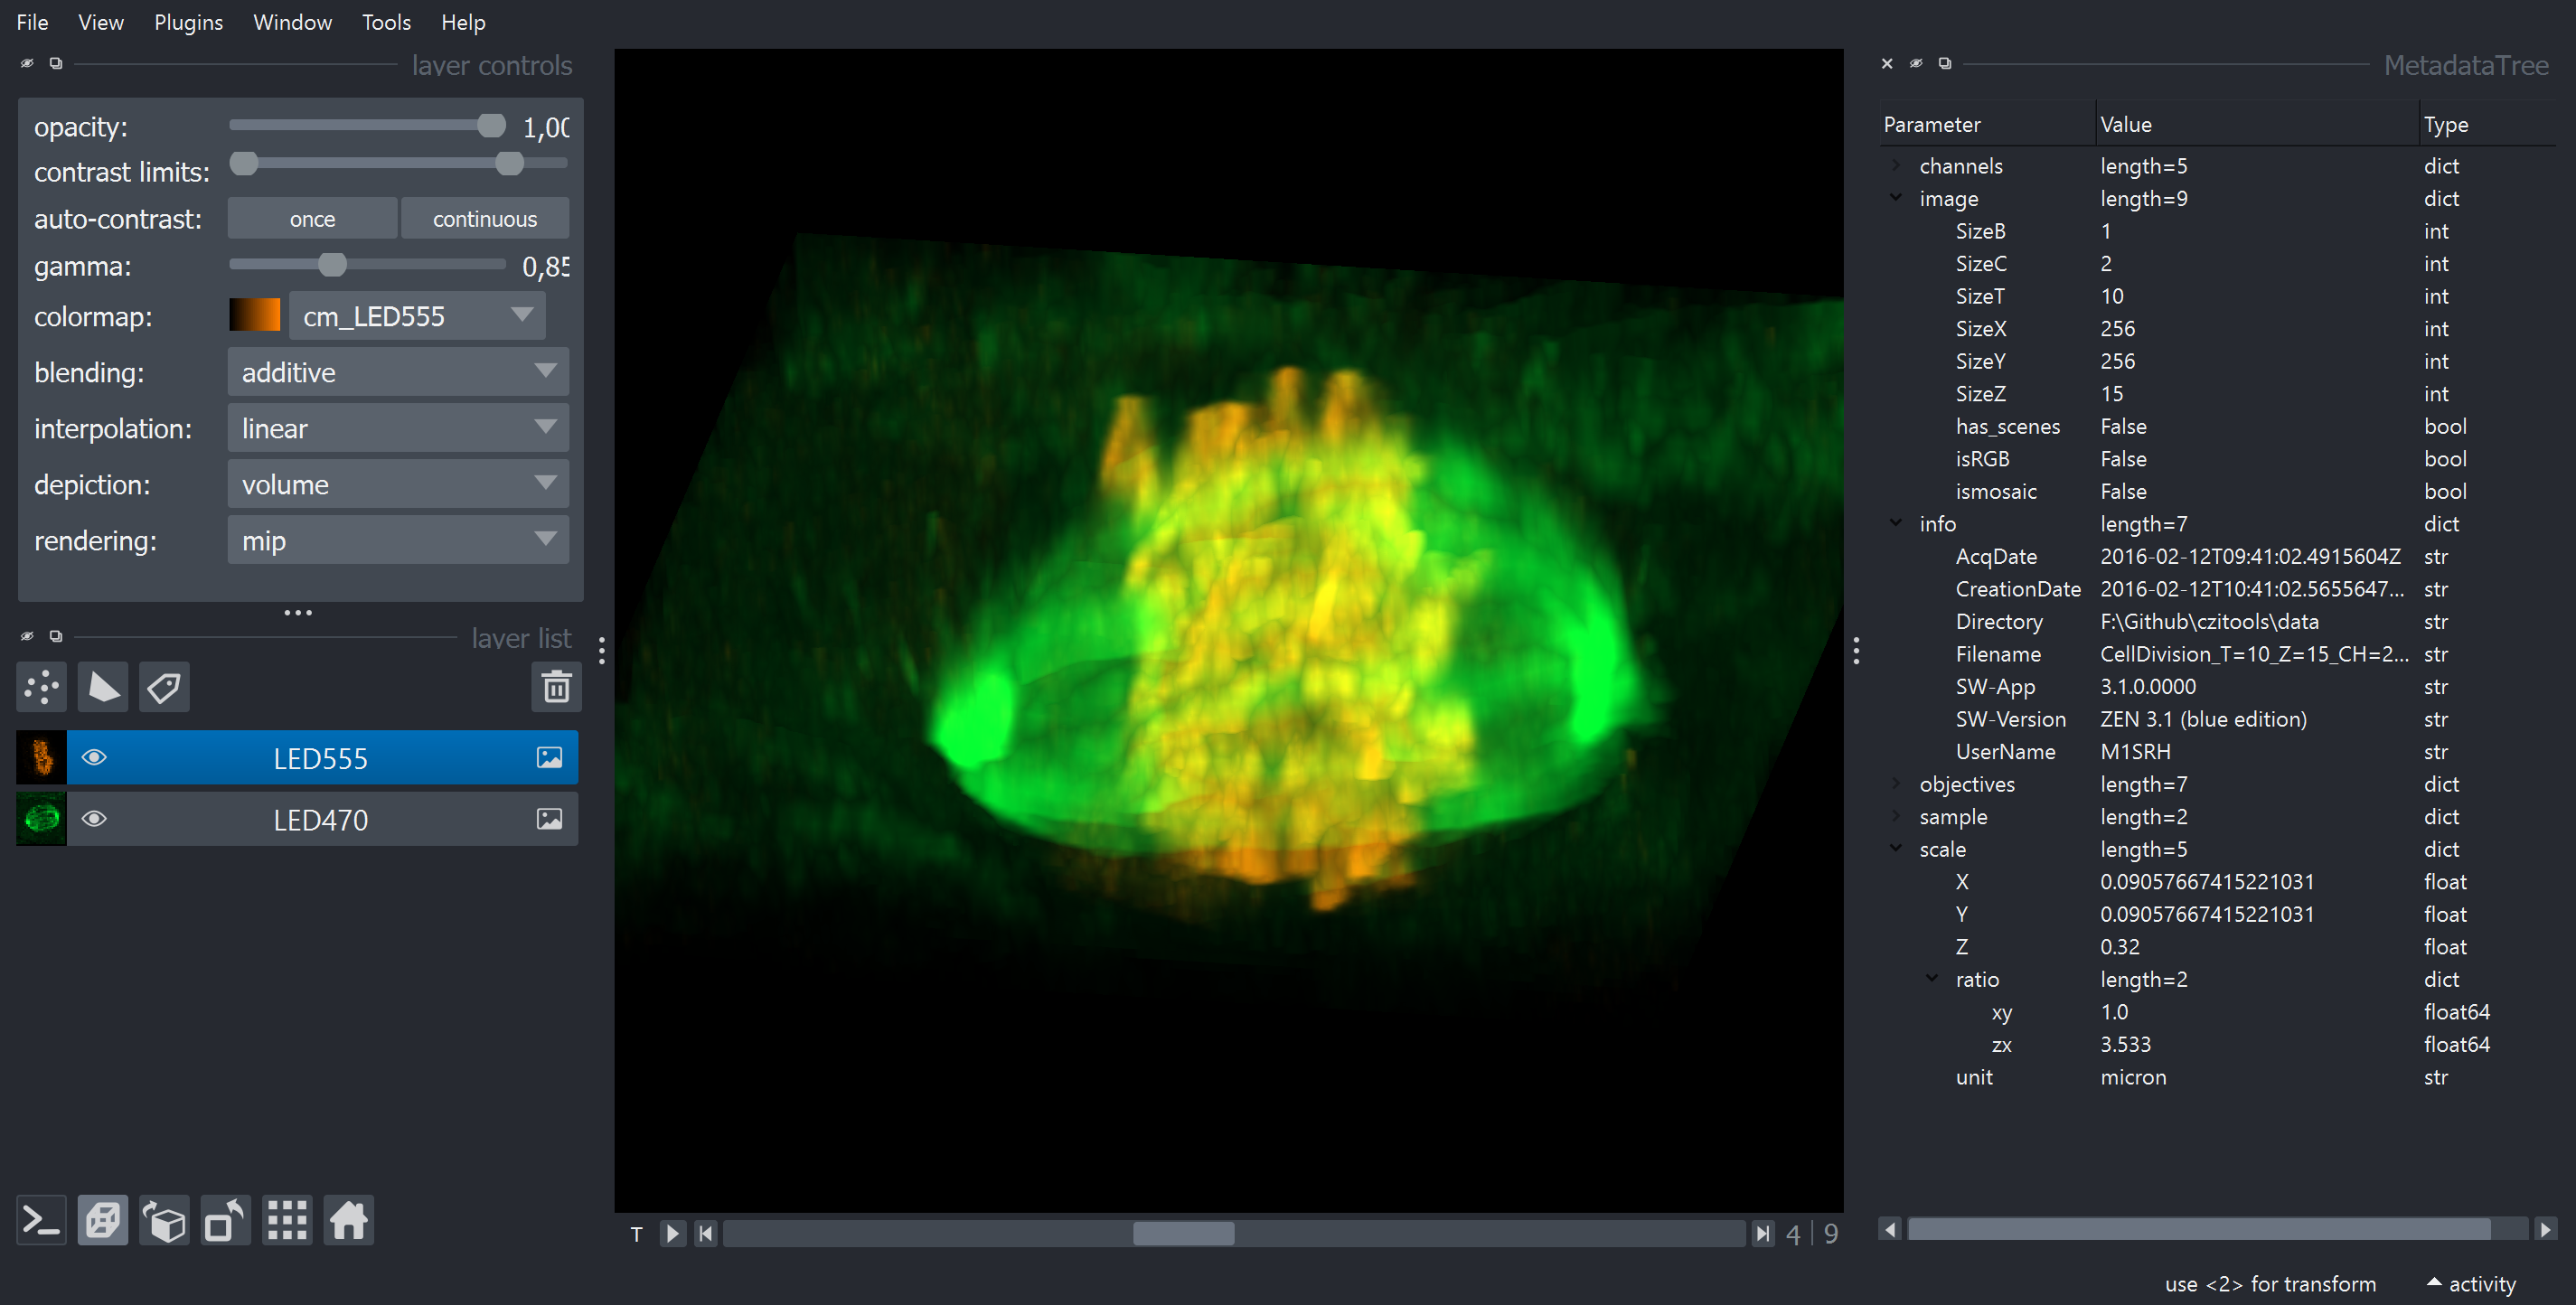

In [10]:
napari.utils.nbscreenshot(viewer)